<a href="https://colab.research.google.com/github/SRINIVASDEVARAJULA/Algorithmic-Trading-Using-Neural-Networks/blob/main/lstm_2020-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import math 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [9]:
import tensorflow as tf
from tensorflow import keras


In [10]:
print(tf.__version__)

2.9.2


In [4]:
np.random.seed(19)

In [11]:
df=pd.read_csv("df_2020.csv")

In [12]:
df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2020.01.01 23:00:00,1518.768,1520.675,1518.768,1519.895,0.02014,1519.592,1521.245,1519.435,1520.385,0.01987
1,2020.01.01 23:01:00,1519.875,1520.335,1519.595,1520.315,0.00880,1520.385,1520.825,1520.085,1520.805,0.00907
2,2020.01.01 23:02:00,1520.285,1520.305,1520.035,1520.205,0.00640,1520.785,1520.795,1520.525,1520.695,0.00748
3,2020.01.01 23:03:00,1520.185,1520.275,1520.015,1520.275,0.00390,1520.675,1520.765,1520.515,1520.765,0.00417
4,2020.01.01 23:04:00,1520.325,1520.685,1520.195,1520.505,0.00767,1520.825,1521.175,1520.705,1520.985,0.00830


In [13]:
df['Local time']=df['Local time'].str[0:22]
df['Local time']

0         2020.01.01 23:00:00
1         2020.01.01 23:01:00
2         2020.01.01 23:02:00
3         2020.01.01 23:03:00
4         2020.01.01 23:04:00
                 ...         
355585    2020.12.31 21:55:00
355586    2020.12.31 21:56:00
355587    2020.12.31 21:57:00
355588    2020.12.31 21:58:00
355589    2020.12.31 21:59:00
Name: Local time, Length: 355590, dtype: object

In [14]:
df["Open"]=(df["Open_Bid"]+df["Open_Ask"])/2
df["High"]=(df["High_Bid"]+df["High_Ask"])/2
df["Low"]=(df["Low_Bid"]+df["Low_Ask"])/2
df["Close"]=(df["Close_Bid"]+df["Close_Ask"])/2


In [15]:
df.shape

(355590, 15)

In [16]:
df=df[:30000]
df.shape

(30000, 15)

In [17]:
df.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Open,High,Low,Close
0,2020.01.01 23:00:00,1518.768,1520.675,1518.768,1519.895,0.02014,1519.592,1521.245,1519.435,1520.385,0.01987,1519.180,1520.96,1519.1015,1520.140
1,2020.01.01 23:01:00,1519.875,1520.335,1519.595,1520.315,0.00880,1520.385,1520.825,1520.085,1520.805,0.00907,1520.130,1520.58,1519.8400,1520.560
2,2020.01.01 23:02:00,1520.285,1520.305,1520.035,1520.205,0.00640,1520.785,1520.795,1520.525,1520.695,0.00748,1520.535,1520.55,1520.2800,1520.450
3,2020.01.01 23:03:00,1520.185,1520.275,1520.015,1520.275,0.00390,1520.675,1520.765,1520.515,1520.765,0.00417,1520.430,1520.52,1520.2650,1520.520
4,2020.01.01 23:04:00,1520.325,1520.685,1520.195,1520.505,0.00767,1520.825,1521.175,1520.705,1520.985,0.00830,1520.575,1520.93,1520.4500,1520.745


In [18]:
data=df.drop(['Local time','Open_Bid','High_Bid','Low_Bid','Close_Bid','Open_Ask','High_Ask','Low_Ask','Close_Ask'],axis=1)

In [19]:
data=data.drop(['Volume_Bid','Volume_Ask'],axis=1)

In [20]:
data.head()

,Open,High,Low,Close
0,1519.180,1520.96,1519.1015,1520.140
1,1520.130,1520.58,1519.8400,1520.560
2,1520.535,1520.55,1520.2800,1520.450
3,1520.430,1520.52,1520.2650,1520.520
4,1520.575,1520.93,1520.4500,1520.745


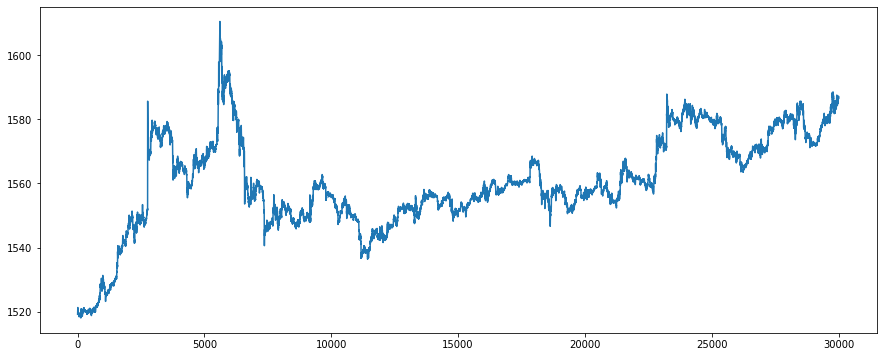

In [21]:
data['Open'].plot(figsize=(15,6))

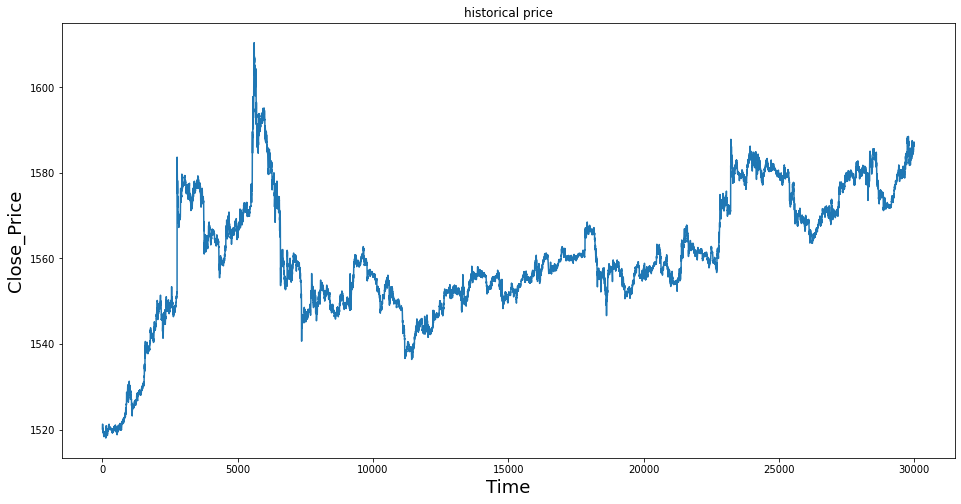

In [22]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Time', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [23]:
data_mini = data.iloc[-100:] # Select recent data rows
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data_mini.index, open=data_mini['Open'], high=data_mini['High'], low=data_mini['Low'], close=data_mini['Close'])])
fig.show()


In [24]:

#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .9 ))
validation_data_len = int(np.ceil( len(dataset) * .05 ))
test_data_len = int(np.ceil( len(dataset) * .05 ))
print(training_data_len)
print(validation_data_len)
print(test_data_len)

27000
1500
1500


In [25]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data[:5]

array([[0.02299074],
       [0.0275348 ],
       [0.02634469],
       [0.02710203],
       [0.02953634]])

In [27]:
data.head()

,Close
0,1520.140
1,1520.560
2,1520.450
3,1520.520
4,1520.745


In [28]:
#downsizing
#data['Open']=pd.to_numeric(data['Open'],downcast='float')
#data['High']=pd.to_numeric(data['High'],downcast='float')
#data['Low']=pd.to_numeric(data['Low'],downcast='float')
#data['Close']=pd.to_numeric(data['Close'],downcast='float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   30000 non-null  float64
dtypes: float64(1)
memory usage: 234.5 KB


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
## Negative volume implies lack of liquidity in the marketdata
#data[data.Volume_Bid < 0] #no values
print(data.isna().sum())

Close    0
dtype: int64


In [32]:
train_data = scaled_data[0:int(training_data_len), :]
valid_data = scaled_data[int(training_data_len)- 60: int(training_data_len) + int(validation_data_len), :]
print(train_data.shape)
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(27000, 1)
[array([0.02299074, 0.0275348 , 0.02634469, 0.02710203, 0.02953634,
       0.03249539, 0.03254948, 0.03514609, 0.03411826, 0.03283619,
       0.02446756, 0.0265773 , 0.02219553, 0.01905797, 0.02035628,
       0.02041037, 0.02252011, 0.02473804, 0.02176277, 0.02160048,
       0.02073495, 0.01835473, 0.02149229, 0.01949074, 0.01716462,
       0.02084314, 0.0187334 , 0.01640728, 0.01543355, 0.01862521,
       0.01840882, 0.017381  , 0.017381  , 0.017381  , 0.01554174,
       0.01202551, 0.01191732, 0.01305333, 0.01197142, 0.01516307,
       0.01635318, 0.01759739, 0.0161368 , 0.01413525, 0.01581222,
       0.0122419 , 0.0121337 , 0.00656183, 0.00905024, 0.00764375,
       0.00769784, 0.00894205, 0.00935859, 0.00764375, 0.00813061,
       0.00780603, 0.00672412, 0.0068864 , 0.00346214, 0.00459815])]
[0.008871722466555099]

[array([0.02299074, 0.0275348 , 0.02634469, 0.02710203, 0.02953634,
       0.03249539, 0.03254948, 0.03514609, 0.03411826, 0.03283619,
       0.02446756, 0.02

(26940, 60, 1)

In [33]:
#Split the data into x_valid and y_valid data sets
x_valid = []
y_valid = []

for i in range(60, len(valid_data)):
    x_valid.append(valid_data[i-60:i, 0])
    y_valid.append(valid_data[i, 0])
    if i<= 61:
        print(x_valid)
        print(y_valid)
        print()
        
# Convert the x_valid and y_valid to numpy arrays 
x_valid, y_valid = np.array(x_valid), np.array(y_valid)

#Reshape the data
x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))
x_valid.shape

[array([0.59472998, 0.59703987, 0.60187064, 0.59961484, 0.60107543,
       0.59663956, 0.59674776, 0.60051824, 0.59966893, 0.59204142,
       0.59431344, 0.59786754, 0.60415889, 0.60123771, 0.59609861,
       0.58803832, 0.58778948, 0.58694018, 0.58910401, 0.58782194,
       0.58245022, 0.57924233, 0.57788994, 0.57796026, 0.5748227 ,
       0.57942085, 0.58455996, 0.58055686, 0.57821451, 0.58057309,
       0.58235826, 0.5813683 , 0.58354836, 0.58214187, 0.58153059,
       0.58560401, 0.58488453, 0.5804649 , 0.57218823, 0.5691805 ,
       0.56479874, 0.56717895, 0.57190152, 0.57107386, 0.57601281,
       0.57783584, 0.57444403, 0.57594249, 0.57601281, 0.57195562,
       0.56506922, 0.56225623, 0.55940538, 0.5577825 , 0.55251897,
       0.55275159, 0.55799889, 0.55841542, 0.55911867, 0.5613907 ])]
[0.5599842040063407]

[array([0.59472998, 0.59703987, 0.60187064, 0.59961484, 0.60107543,
       0.59663956, 0.59674776, 0.60051824, 0.59966893, 0.59204142,
       0.59431344, 0.59786754, 0.604

(1500, 60, 1)

In [34]:
from keras.callbacks import EarlyStopping
#es = EarlyStopping(monitor='val_loss')
#es = EarlyStopping(monitor='val_loss', mode='min')
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
#es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)
#es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU

#Build the LSTM/GRU model
# LSTM Layer returns whole_seq_output, final_memory_state, and final_carry_state 
# GRU Layer whole_sequence_output, and final_state
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))

model.add(LSTM(128, return_sequences= True))
model.add(LSTM(256, return_sequences= False))
model.add(Dense(25,activation="relu", kernel_initializer="uniform"))
model.add(Dense(1,activation="relu"))
#model.add(GRU(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))

# model.add(GRU(128, return_sequences= True))
# model.add(GRU(256, return_sequences= False))
# model.add(Dense(25,activation="relu", kernel_initializer="uniform"))
# model.add(Dense(1,activation="relu"))
print(model.summary())
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = model.fit(x_train, y_train, batch_size=1, validation_data=(x_valid, y_valid), epochs=10, callbacks=[es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 60, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 256)               394240    
                                                                 
 dense (Dense)               (None, 25)                6425      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 516,403
Trainable params: 516,403
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
23464/26940 [=====================

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss)) 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
test_data = scaled_data[training_data_len + validation_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len + validation_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

In [ ]:
mse=np.mean(((predictions - y_test) ** 2))
mse

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len : training_data_len + validation_data_len]
test = data[training_data_len + validation_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close']])
plt.plot(test[['Close','Predictions' ]])
plt.legend(['Train', 'Valid',  'Test', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
y_test[:5]

In [ ]:
predictions[:5]